In [1]:
import sys
sys.path.append('./../')

In [2]:
import numpy as np
import networkx as nx
from scipy.special import gammaln
import matplotlib.pyplot as plt
import pdb
import importlib

In [3]:
import optim
import sparsedense as spd

In [4]:
importlib.reload(optim)
importlib.reload(spd)

<module 'sparsedense' from './..\\sparsedense.py'>

In [5]:
links = np.genfromtxt('enron.tsv', delimiter='\t', dtype=int)
g = nx.Graph()
g.add_edges_from(links)
net = nx.adjacency_matrix(g).toarray().astype(int)
for i in range(net.shape[0]):
    net[i, i] = 1

In [6]:
alpha0 = 3.
sigma0 = .5
c0 = 20.
lamb0 = 800.

model = spd.NetworkFull(net, links, alpha=alpha0, sigma=sigma0, c=c0, lamb=lamb0)

In [7]:
model.clique_init()

(2772, 1172)


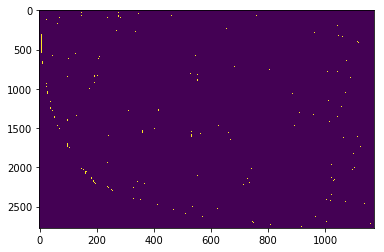

In [8]:
Z = model.Z
print(Z.shape)
plt.imshow(Z, aspect = 'auto')
plt.show()

In [ ]:
est_alpha, est_sigma, est_c = optim.optimize_hypers(
    model.Z, model.alpha, model.sigma, model.c, momentum = 0.,
    num_iters = 2000, print_every = 100, h = 1e-8)

iter      0: alpha:      3.000, sigma: 0.500, c:   20.000, ll: -40237.456, grad:    -44.885,   -915.715,     -3.222, step: 6.25e-05
iter      1: alpha:      2.997, sigma: 0.443, c:   20.000, ll: -40215.589, grad:     31.440,    113.108,      3.019, step: 0.000125
iter    101: alpha:      3.250, sigma: 0.428, c:   20.027, ll: -40210.606, grad:     17.916,     56.437,      2.425, step: 0.000125
iter    201: alpha:      3.407, sigma: 0.418, c:   20.050, ll: -40208.687, grad:     11.598,     34.478,      1.751, step: 0.000125
iter    301: alpha:      3.513, sigma: 0.413, c:   20.071, ll: -40207.789, grad:      7.101,     10.306,      1.600, step: 0.000125
iter    401: alpha:      3.586, sigma: 0.408, c:   20.090, ll: -40207.363, grad:      5.285,     10.888,      1.257, step: 0.000125
